In [ ]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Magang/Data_Listdeal (1).xlsx')
df

,Antrian,ID SPK,Tipe Order,CS,Konsumen,Penulis,Tgl Masuk Naskah,Tgl Mulai Proses,No Telp,Alamat,Email,Judul Naskah,Tanggal Deal,ISBN,Sales_Order,Kuantitas,Alamat Kirim,Nurturing,Deadline
0,NaN,6285,order,Gupita-CS 11,BUDI SASTRA PANJAITAN,"Dr. BUDI SASTRA PANJAITAN, S.H., M.Hum. Editor...",2023-05-04 13:19:00,2023-05-04 13:19:00,81262418806,NaN,budisastrapanjaitan@uinsu.ac.id,HUKUM BISNIS SUDUT PANDANG ADVOKAT (CETAK ULANG),2023-05-04,978-623-02-6246-3,3234000,22,AYU ANDIRA(082273624915) Alamat Kirim Buku : D...,Nurturing2,2023-05-09
1,NaN,6278,cetak ulang,Galuh-CS 4,Febrina Sari,Febrina Sari,2023-05-03 09:59:00,2023-05-03 09:59:00,85263394975,NaN,febri_ghaniya@yahoo.co.id,Metode Dalam Pengambilan Keputusan (reorder) (...,2023-05-03,NaN,5720000,55,Febrina Sari 085263394975 d/a : Sekolah Tinggi...,Nurturing,2023-05-20
2,NaN,6276,cetak ulang,Jefry-CS 3,"Arief Tasrig Nur Gomo, STP, MSi.","Arief Tasrig Nur Gomo, STP, MSi.",2023-05-02 13:38:00,2023-05-02 13:38:00,8129294267,NaN,arieftnurgomo@gmail.com,Healthy Food & 25 Ideas of Healthy Cooking (CE...,2023-05-03,978-623-02-2727-1,4300000,50,"Arief Tasrig Nur Gomo, STP, MSi.( 08129294267 ...",Nurturing,2023-05-19
3,NaN,6272,cetak ulang,Gupita-CS 11,BUDI SASTRA PANJAITAN,"Dr. BUDI SASTRA PANJAITAN, S.H., M.Hum. Editor...",2023-04-28 08:16:00,2023-04-28 08:16:00,81262418806,NaN,budisastrapanjaitan@uinsu.ac.id,HUKUM BISNIS SUDUT PANDANG ADVOKAT (CETAK ULANG),2023-04-28,978-623-02-6246-3,8024001,61,wahyu Triono putra (082127685484) jalan suluk ...,Nurturing2,2023-05-03
4,NaN,6258,order ebook,Vivin-CS 10,Mukhlis Akhadi,Mukhlis Akhadi,2023-04-18 13:29:00,2023-04-18 13:29:00,81411147855,NaN,mukh001@brin.go.id,Radioekologi Radionuklida Kosmogenik (CETAK UL...,2023-04-18,978-623-02-3753-9,1100000,1,Mukhlis Akhadi 0814 1114 7855 Perumahan Batan ...,Nurturing,2023-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,9999,990,order,Vivin-CS 10,"Drs. Isma Tantawi, M.A.","Drs. Isma Tantawi, M.A.",2019-05-27 14:29:00,2019-07-10 10:56:00,8126543562,NaN,ismafibusu@gmail.com,Saman: Tari Tangan Seribu dari Dataran Tinggi ...,2020-05-12,978-623-02-0980-2,2902500,25,"Jl. Flamboyan Raya/Mawar, Gang Kesuma Nomor 7 ...",Nurturing2,2020-05-12
5152,655,677,order,Prasida-CS 2,"Mesrida Simarmata, SST, M. Biomed","MESRIDA SIMARMATA, SST, M. BIOMED",2019-06-27 09:04:00,2019-06-27 09:04:00,85276008527,NaN,mesridasimarta@yahoo.co.id,Buku Kehamilan,2020-01-27,978-623-02-0547-7,2960000,50,"Jalan Menteng VII No 94, Menteng, Medan Denai,...",NaN,2020-02-01
5153,NaN,49,order,Jefry-CS 3,Timbo Mangaranap Sirait,Timbo Mangaranap Sirait,2019-06-17 14:21:00,2019-06-17 14:22:00,85322001957,NaN,the.timeslawfirm@gmail.com,HUKUM PIDANA PAJAK INDONESIA (Materiil dan For...,2019-07-12,978-623-209-841-1,9984000,260,Times Law Firm Green Palace Kalibata City Towe...,Nurturing,2019-07-31
5154,211,993,order,Prasida-CS 2,Syamsul Arifin (Been Suyat),Been Suyat,2019-05-29 08:42:00,2019-05-29 08:46:00,81937559054,NaN,binsuyat@gmail.com,STRATEGI JITU BERKOMUNIKASI DENGAN ANAK,2020-05-08,978-623-02-0962-8,3576000,12,Alamat pengiriman Muhammad Jiddan Masjid Al Ih...,Nurturing,2020-06-06


In [ ]:
#Cek data yang kosong
df.isnull().sum()

Antrian              715
ID SPK                 0
Tipe Order             0
CS                     0
Konsumen               0
Penulis                0
Tgl Masuk Naskah       0
Tgl Mulai Proses       0
No Telp                0
Alamat              5151
Email                  0
Judul Naskah           0
Tanggal Deal           0
ISBN                 718
Sales_Order            0
Kuantitas              0
Alamat Kirim           0
Nurturing           1617
Deadline              22
dtype: int64

In [ ]:
#Pemilihan Atribut

df1 = df.drop(columns=['ID SPK','Antrian','Tipe Order','CS','Konsumen','Penulis',
                       'Tgl Mulai Proses','Tgl Mulai Proses', 'No Telp','Alamat','Judul Naskah',
                       'ISBN','Alamat Kirim','Nurturing','Deadline','Kuantitas','Tgl Masuk Naskah'])
df1

,Email,Tanggal Deal,Sales_Order
0,budisastrapanjaitan@uinsu.ac.id,2023-05-04,3234000
1,febri_ghaniya@yahoo.co.id,2023-05-03,5720000
2,arieftnurgomo@gmail.com,2023-05-03,4300000
3,budisastrapanjaitan@uinsu.ac.id,2023-04-28,8024001
4,mukh001@brin.go.id,2023-04-18,1100000
...,...,...,...
5151,ismafibusu@gmail.com,2020-05-12,2902500
5152,mesridasimarta@yahoo.co.id,2020-01-27,2960000
5153,the.timeslawfirm@gmail.com,2019-07-12,9984000
5154,binsuyat@gmail.com,2020-05-08,3576000


In [ ]:
#menampilkan informasi dari dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Email         5156 non-null   object        
 1   Tanggal Deal  5156 non-null   datetime64[ns]
 2   Sales_Order   5156 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 121.0+ KB


In [ ]:
#Menghitung Nilai Recency

df_recency = df1.groupby(by='Email', as_index=False)['Tanggal Deal'].max()

df_recency.columns = ['Email_Cust', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency

,Email_Cust,LastPurchaseDate,Recency
0,07202023@spidi.my.id,2022-10-04,216
1,0812ibnu@gmail.com,2023-05-03,5
2,163202504@uii.ac.id,2023-04-04,34
3,16sangadji@gmail.com,2023-04-12,26
4,173220501@uii.ac.id,2021-08-03,643
...,...,...,...
2878,zulkifliyusuf120@gmail.com,2022-11-07,182
2879,zulkiflymuhammad@yahoo.co.id,2022-03-15,419
2880,zulvyahfaisal@poliupg.ac.id,2022-11-02,187
2881,zuma.yakuza@gmail.com,2023-01-16,112


In [ ]:
#Menghitung nilai Frequency

frequency_df = df1.drop_duplicates().groupby(by=['Email'], as_index=False)['Tanggal Deal'].count()
frequency_df.columns = ['Email_Cust', 'Frequency']
frequency_df

,Email_Cust,Frequency
0,07202023@spidi.my.id,1
1,0812ibnu@gmail.com,5
2,163202504@uii.ac.id,1
3,16sangadji@gmail.com,1
4,173220501@uii.ac.id,1
...,...,...
2878,zulkifliyusuf120@gmail.com,1
2879,zulkiflymuhammad@yahoo.co.id,1
2880,zulvyahfaisal@poliupg.ac.id,1
2881,zuma.yakuza@gmail.com,1


In [ ]:
#Menghitung nilai Monetary
monetary_df = df.groupby(by='Email', as_index=False)['Sales_Order'].sum()
monetary_df.columns = ['Email_Cust', 'Monetary']
monetary_df.head()

,Email_Cust,Monetary
0,07202023@spidi.my.id,8727264
1,0812ibnu@gmail.com,8646000
2,163202504@uii.ac.id,3000000
3,16sangadji@gmail.com,2925000
4,173220501@uii.ac.id,2200000


In [ ]:
#Menggabungkan Recency,Frequency, dan Monetary

rf_df = df_recency.merge(frequency_df, on='Email_Cust')
rfm_df = rf_df.merge(monetary_df, on='Email_Cust').drop(columns='LastPurchaseDate')
rfm_df

,Email_Cust,Recency,Frequency,Monetary
0,07202023@spidi.my.id,216,1,8727264
1,0812ibnu@gmail.com,5,5,8646000
2,163202504@uii.ac.id,34,1,3000000
3,16sangadji@gmail.com,26,1,2925000
4,173220501@uii.ac.id,643,1,2200000
...,...,...,...,...
2878,zulkifliyusuf120@gmail.com,182,1,1100000
2879,zulkiflymuhammad@yahoo.co.id,419,1,12000000
2880,zulvyahfaisal@poliupg.ac.id,187,1,4225000
2881,zuma.yakuza@gmail.com,112,1,2975000


In [ ]:
#Validasi data, apakah rfm sudah benar atau belum?

cust1 = rfm_df[rfm_df['Email_Cust']=='07202023@spidi.my.id']
cust1

,Email_Cust,Recency,Frequency,Monetary
0,07202023@spidi.my.id,216,1,8727264


In [ ]:
quantiles = rfm_df.quantile(q=[0, 0.15, 0.29, 0.43, 0.57, 0.71, 0.85])
quantiles

<ipython-input-29-8e95c4fd5e79>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = rfm_df.quantile(q=[0, 0.15, 0.29, 0.43, 0.57, 0.71, 0.85])


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
0.00,0.00,1.0,1000000.0,1.0,1.0,1.0,3.0
0.15,89.00,1.0,2175900.0,1.0,1.0,2.0,4.0
0.29,173.00,1.0,2978900.0,1.0,1.0,3.0,5.0
0.43,277.26,1.0,3850000.0,1.0,1.0,3.0,6.0
0.57,466.00,1.0,5124350.0,2.0,1.0,4.0,7.0
0.71,689.22,1.0,7202750.0,2.0,1.0,4.0,8.0
0.85,914.70,2.0,11868000.0,3.0,4.0,4.0,10.0


In [ ]:
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.0: 0.0,
  0.15: 89.0,
  0.29: 173.0,
  0.43: 277.26,
  0.57: 466.0,
  0.71: 689.2199999999998,
  0.85: 914.6999999999998},
 'Frequency': {0.0: 1.0,
  0.15: 1.0,
  0.29: 1.0,
  0.43: 1.0,
  0.57: 1.0,
  0.71: 1.0,
  0.85: 2.0},
 'Monetary': {0.0: 1000000.0,
  0.15: 2175900.0,
  0.29: 2978900.0,
  0.43: 3850000.0,
  0.57: 5124349.999999999,
  0.71: 7202749.999999997,
  0.85: 11867999.999999993},
 'R_Quartile': {0.0: 1.0,
  0.15: 1.0,
  0.29: 1.0,
  0.43: 1.0,
  0.57: 2.0,
  0.71: 2.0,
  0.85: 3.0},
 'F_Quartile': {0.0: 1.0,
  0.15: 1.0,
  0.29: 1.0,
  0.43: 1.0,
  0.57: 1.0,
  0.71: 1.0,
  0.85: 4.0},
 'M_Quartile': {0.0: 1.0,
  0.15: 2.0,
  0.29: 3.0,
  0.43: 3.0,
  0.57: 4.0,
  0.71: 4.0,
  0.85: 4.0},
 'RFM_Score': {0.0: 3.0,
  0.15: 4.0,
  0.29: 5.0,
  0.43: 6.0,
  0.57: 7.0,
  0.71: 8.0,
  0.85: 10.0}}

In [ ]:
RFMSegmentation = rfm_df

In [ ]:
#Segmentasi RFM Method
def RClass(x,p,d):
    if x <= d[p][0]:
        return 7
    elif x <= d[p][0.15]:
        return 6
    elif x <= d[p][0.29]:
        return 5
    elif x <= d[p][0.43]:
        return 4
    elif x <= d[p][0.57]:
        return 3
    elif x <= d[p][0.71]:
        return 2
    else:
        return 1
    RClass()

In [ ]:
#Segmentasi RFM Method
def FMClass(x,p,d):
    if x <= d[p][0]:
        return 1
    elif x <=d[p][0.15]:
        return 2
    elif x <= d[p][0.29]:
        return 3
    elif x <=d[p][0.43]:
        return 4
    elif x <=d[p][0.57]:
        return 5
    elif x <=d[p][0.71]:
        return 6
    else:
        return 7
    FMClass()

In [ ]:
RFMSegmentation['R_Quartile'] = RFMSegmentation['Recency'].apply(RClass, args=('Recency', quantiles,))
RFMSegmentation['F_Quartile'] = RFMSegmentation['Frequency'].apply(FMClass, args=('Frequency', quantiles,))
RFMSegmentation['M_Quartile'] = RFMSegmentation['Monetary'].apply(FMClass, args=('Monetary', quantiles,))

In [ ]:
RFMSegmentation['RFMClass'] = RFMSegmentation.R_Quartile.map(str) \
                            + RFMSegmentation.F_Quartile.map(str) \
                            + RFMSegmentation.M_Quartile.map(str)

In [ ]:
# Calculate RFM_Score
RFMSegmentation['RFM_Score'] = RFMSegmentation[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)

In [ ]:
RFMSegmentation

,Email_Cust,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score,RFM_Level
0,07202023@spidi.my.id,216,1,8727264,4,1,7,417,12,Potential
1,0812ibnu@gmail.com,5,5,8646000,6,7,7,677,20,Cannot Loose Them
2,163202504@uii.ac.id,34,1,3000000,6,1,4,614,11,Potential
3,16sangadji@gmail.com,26,1,2925000,6,1,3,613,10,Potential
4,173220501@uii.ac.id,643,1,2200000,2,1,3,213,6,Activation Needed
...,...,...,...,...,...,...,...,...,...,...
2878,zulkifliyusuf120@gmail.com,182,1,1100000,4,1,2,412,7,Activation Needed
2879,zulkiflymuhammad@yahoo.co.id,419,1,12000000,3,1,7,317,11,Potential
2880,zulvyahfaisal@poliupg.ac.id,187,1,4225000,4,1,5,415,10,Potential
2881,zuma.yakuza@gmail.com,112,1,2975000,5,1,3,513,9,Potential


In [ ]:
RFMSegmentation.describe()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
count,2883.000000,2883.000000,2.883000e+03,2883.000000,2883.000000,2883.000000,2883.000000
mean,459.884842,1.761707,7.859609e+06,3.156434,2.650364,4.848422,10.655220
std,352.391535,3.233848,1.262819e+07,1.831793,2.679734,1.825561,4.756868
min,0.000000,1.000000,1.000000e+06,1.000000,1.000000,1.000000,4.000000
25%,146.500000,1.000000,2.704000e+06,1.000000,1.000000,3.000000,7.000000
50%,383.000000,1.000000,4.400000e+06,3.000000,1.000000,5.000000,10.000000
75%,760.000000,2.000000,8.105000e+06,5.000000,7.000000,7.000000,14.000000
max,1298.000000,88.000000,2.307101e+08,7.000000,7.000000,7.000000,21.000000


In [ ]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 19 :
        return "Cluster 1"
    elif ((df['RFM_Score'] >= 16)):
        return 'Cluster 2'
    elif ((df['RFM_Score'] >= 13)):
        return 'Cluster 3'
    elif ((df['RFM_Score'] >= 10)):
        return 'Cluster 4'
    elif ((df['RFM_Score'] >= 8)):
        return 'Cluster 5'
    elif ((df['RFM_Score'] >= 6)):
        return 'Cluster 6'
    else :
        return 'Cluster 7'

In [ ]:
# Create a new variable RFM_Level
RFMSegmentation['RFM_Level'] = RFMSegmentation.apply(rfm_level, axis=1)

In [ ]:
RFMSegmentation

,Email_Cust,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score,RFM_Level
0,07202023@spidi.my.id,216,1,8727264,4,1,7,417,12,Cluster 4
1,0812ibnu@gmail.com,5,5,8646000,6,7,7,677,20,Cluster 1
2,163202504@uii.ac.id,34,1,3000000,6,1,4,614,11,Cluster 4
3,16sangadji@gmail.com,26,1,2925000,6,1,3,613,10,Cluster 4
4,173220501@uii.ac.id,643,1,2200000,2,1,3,213,6,Cluster 6
...,...,...,...,...,...,...,...,...,...,...
2878,zulkifliyusuf120@gmail.com,182,1,1100000,4,1,2,412,7,Cluster 6
2879,zulkiflymuhammad@yahoo.co.id,419,1,12000000,3,1,7,317,11,Cluster 4
2880,zulvyahfaisal@poliupg.ac.id,187,1,4225000,4,1,5,415,10,Cluster 4
2881,zuma.yakuza@gmail.com,112,1,2975000,5,1,3,513,9,Cluster 5


In [ ]:
RFMSegmentation.to_excel('RFMSegmentationnnn.xlsx')

DI BAWAH INI MAU COBA VISUAL SCATTER PLOT

TypeError: ignored

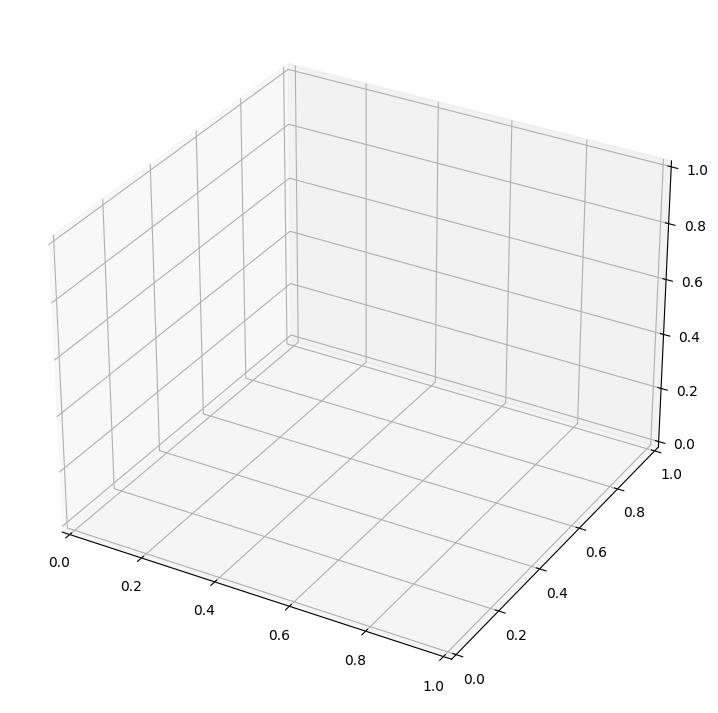

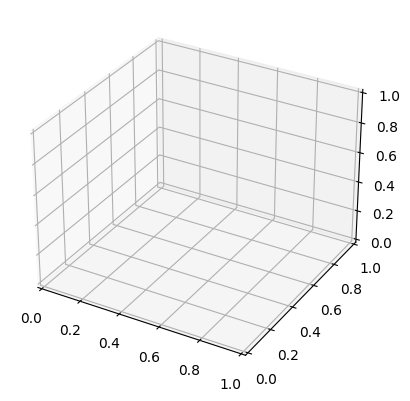

In [ ]:
from pandas.core.series import Frequency
# Creating figure
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Menghitung nilai x, y, z
x = df_recency
y = Frequency
z = monetary_df

# Membuat plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot 3D
sctt = ax.scatter3D(x, y, z,
                    alpha=0.8,
                    c=(x + y + z),
                    cmap='viridis',
                    marker='^')

# Menambahkan judul dan label sumbu
plt.title("RFM Analysis - 3D Scatter Plot")
ax.set_xlabel('R-Quartile', fontweight='bold')
ax.set_ylabel('F-Quartile', fontweight='bold')
ax.set_zlabel('M-Quartile', fontweight='bold')

# Menambahkan colorbar
cbar = fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Total RFM Quartile')

# Menampilkan plot
plt.show()

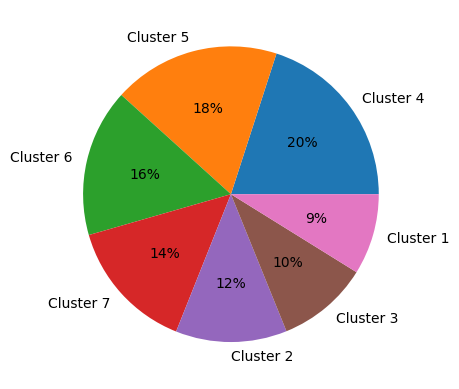

In [ ]:
plt.pie(RFMSegmentation.RFM_Level.value_counts(),
        labels=RFMSegmentation.RFM_Level.value_counts().index,
        autopct='%.0f%%')
plt.show()